# Understanding Impact on Economic Activity

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import acled_conflict_analysis

In [2]:
eth_adm0 = gpd.read_file('../../data/boundaries/eth_admbnda_adm0_csa_bofedb_itos_2021.shp')
eth_adm1 = gpd.read_file('../../data/boundaries/eth_admbnda_adm1_csa_bofedb_2021.shp')
eth_adm2 = gpd.read_file('../../data/boundaries/eth_admbnda_adm2_csa_bofedb_2021.shp')
eth_adm3 = gpd.read_file('../../data/boundaries/eth_admbnda_adm3_csa_bofedb_2021.shp')

In [3]:
eth_adm0_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level0.shp')
eth_adm1_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level1.shp')
eth_adm2_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level2.shp')
#eth_adm3_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level3.shp')

In [4]:
evi_adm0_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm0.csv')
evi_adm1_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm1.csv')
evi_adm0_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm0.csv')
evi_adm1_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm1.csv')

evi_adm2_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm2.csv')
evi_adm2_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm2.csv')
evi_adm2_monthly_zscore = pd.read_csv('../../data/agriculture/processed/eth_zscore_adm2_2019_2024.csv')

In [5]:
evi_adm0_annual['date'] = pd.to_datetime(evi_adm0_annual['date'])
evi_adm0_annual.rename(columns={'mean': 'evi_median'}, inplace=True)

In [6]:
airpollution_adm1 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm1_2019_2024.csv')
airpollution_adm2 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm2_2019_2024.csv')
airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')

C:\Users\wb588851\AppData\Local\Temp\ipykernel_27492\4010708093.py:3: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')


In [7]:
airpollution_adm0 = airpollution_adm1.groupby(['ADM0_EN', 'event_date'])['NO2'].mean().reset_index()

In [8]:
airpollution_adm0.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm1.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm2.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm3.rename(columns={'start_date': 'date'}, inplace=True)

In [9]:
airpollution_adm0['date'] = pd.to_datetime(airpollution_adm0['date'])

In [10]:
airpollution_adm0_annual = airpollution_adm0.groupby(['ADM0_EN', pd.Grouper(key='date', freq='YS')])['NO2'].mean().reset_index()

In [11]:
from acled_conflict_analysis import processing

conflict = pd.read_csv('../../data/conflict/acled_raw_20250612.csv')
conflict.rename(columns={'nrFatalities': 'fatalities'}, inplace=True)
processing.data_type_conversion(conflict)

In [12]:
conflict_adm0_monthly = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='MS')
conflict_adm1_monthly = processing.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='MS')
conflict_adm2_monthly = processing.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='MS')
conflict_adm3_monthly = processing.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='MS')

In [14]:
import numpy as np
def get_conflict_index(df):
    df['conflict_index'] = np.sqrt((df['nrEvents']) * (df['nrFatalities'] + 1))

    return df

In [13]:
conflict_adm0_annual = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='YS')
conflict_adm0_annual = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='YS')
conflict_adm1_annual = processing.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='YS')
conflict_adm2_annual = processing.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='YS')
conflict_adm3_annual = processing.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='YS')

In [15]:
conflict_adm0_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_annual.rename(columns={'event_date': 'date'}, inplace=True)

In [16]:
conflict_adm0_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_monthly.rename(columns={'event_date': 'date'}, inplace=True)

In [17]:
conflict_adm0_monthly = get_conflict_index(conflict_adm0_monthly)
conflict_adm0_annual = get_conflict_index(conflict_adm0_annual)

In [18]:
ntl_adm0_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm0_monthly_2012_2024.csv')
ntl_adm1_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm1_monthly_2012_2024.csv')
ntl_adm2_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm2_monthly_2012_2024.csv')

In [19]:
ntl_adm0_monthly['date'] = pd.to_datetime(ntl_adm0_monthly['date'])
ntl_adm0_annual = ntl_adm0_monthly.groupby(['COUNTRY', pd.Grouper(key='date', freq='YS')])[['ntl_sum']].sum().reset_index()

In [20]:
evi_adm0_annual.rename(columns={'admin_area': 'ADM0_EN'}, inplace=True)
ntl_adm0_annual.rename(columns={'COUNTRY': 'ADM0_EN'}, inplace=True)

In [23]:
merged = pd.merge(airpollution_adm0_annual, conflict_adm0_annual, on=['date', 'ADM0_EN'], how='left')
merged.drop(columns=['index'], inplace=True)

merged = pd.merge(merged, ntl_adm0_annual[['ADM0_EN', 'date', 'ntl_sum']], on=['date', 'ADM0_EN'], how='left')
merged = pd.merge(merged, evi_adm0_annual, on=['date', 'ADM0_EN'], how='left')

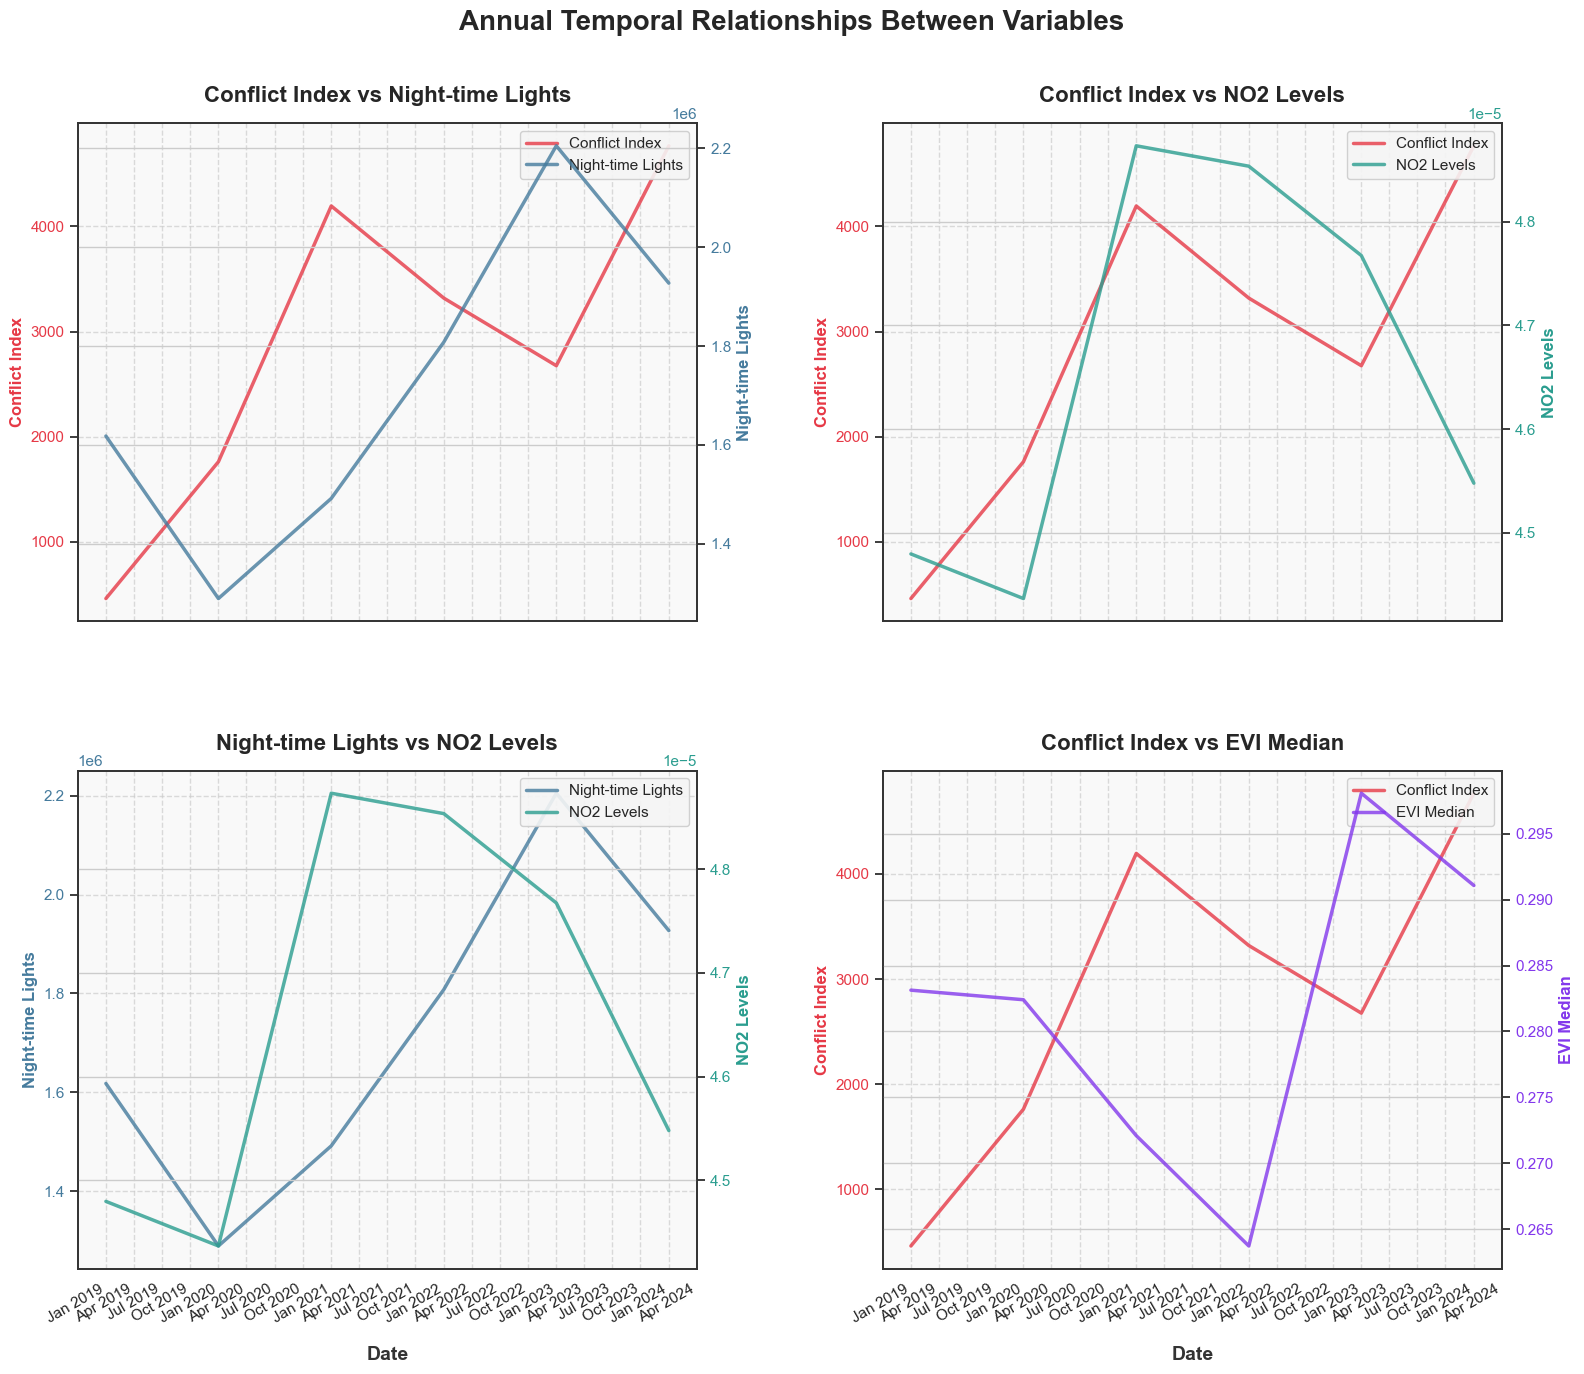

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Plot 1: Conflict vs NTL
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax1_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'Conflict Index vs Night-time Lights', colors['conflict'], colors['ntl'])
ax1.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax1.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: Conflict vs NO2
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax2, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax2_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'Conflict Index vs NO2 Levels', colors['conflict'], colors['no2'])
ax2.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax2_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax2.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: NTL vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax3, label='Night-time Lights', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'Night-time Lights vs NO2 Levels', colors['ntl'], colors['no2'])
ax3.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['ntl'])

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: Conflict vs EVI Median (new plot)
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax4, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'Conflict Index vs EVI Median', colors['conflict'], colors['evi'])
ax4.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Annual Temporal Relationships Between Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/temporal_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

**2024 was a reduction in Nightlights, EVI and Air Pollution, while there was an increase in conflict**

**Conflict and Agriculture**
Existing literature showing that the Tigray war from 2020-2022 cause a loss in food security in the Amhara region ([Muhyie, J. H., et. al., 2025](https://pmc.ncbi.nlm.nih.gov/articles/PMC11789359/)). The fall in EVI in these years could be indicative of that, exacerbated by drought. From 19 May to 21 June 2025, the International Red Cross delieverd seed and fertilizer to the people in Amhara to account for [supply chain disruptions](https://www.icrc.org/en/news-release/ethiopia-thousands-receive-seeds-and-fertilizers-conflict-affected-regions#:~:text=The%20armed%20conflicts%20in%20Ethiopia's%20two%20most,to%20widespread%20food%20insecurity%20among%20rural%20communities.) to resources for these farmers. 

Forecasts and rpedictions suggested that there would be a [conflict and drought-driven loss in agricultural productivity](https://www.fsinplatform.org/sites/default/files/resources/files/GRFC2024-full.pdf#page=71). Although the rain predictions are better than expected, the EVI has fallen which could indicate that conflict has a part to play. 

**NO2, Manufacturing Activity and Movement**
NO2 was seen to reduce in Dire Dawa, a manufacturing hub in Ethiopia. It also reduced across the entire country. This could be both because of reduced movement of vehicles and reduction in industrial production. 

According to the [Ethiopia Statistical Service](https://ess.gov.et/wp-content/uploads/2025/03/external-merchandise-trade-statistics-fourth-quarter-2024.pdf), the number of imports were higher in 2024 compared to 2023, while the exports increased marginally from August-December 2024. 




In [25]:
gdp = pd.read_csv('../../data/general/eth_gdp.csv')
gdp['Year'] = pd.to_datetime(gdp['Year'])
gdp.rename(columns={'Year':'date'}, inplace=True)

In [26]:
merged = merged.merge(gdp, on=['date'])

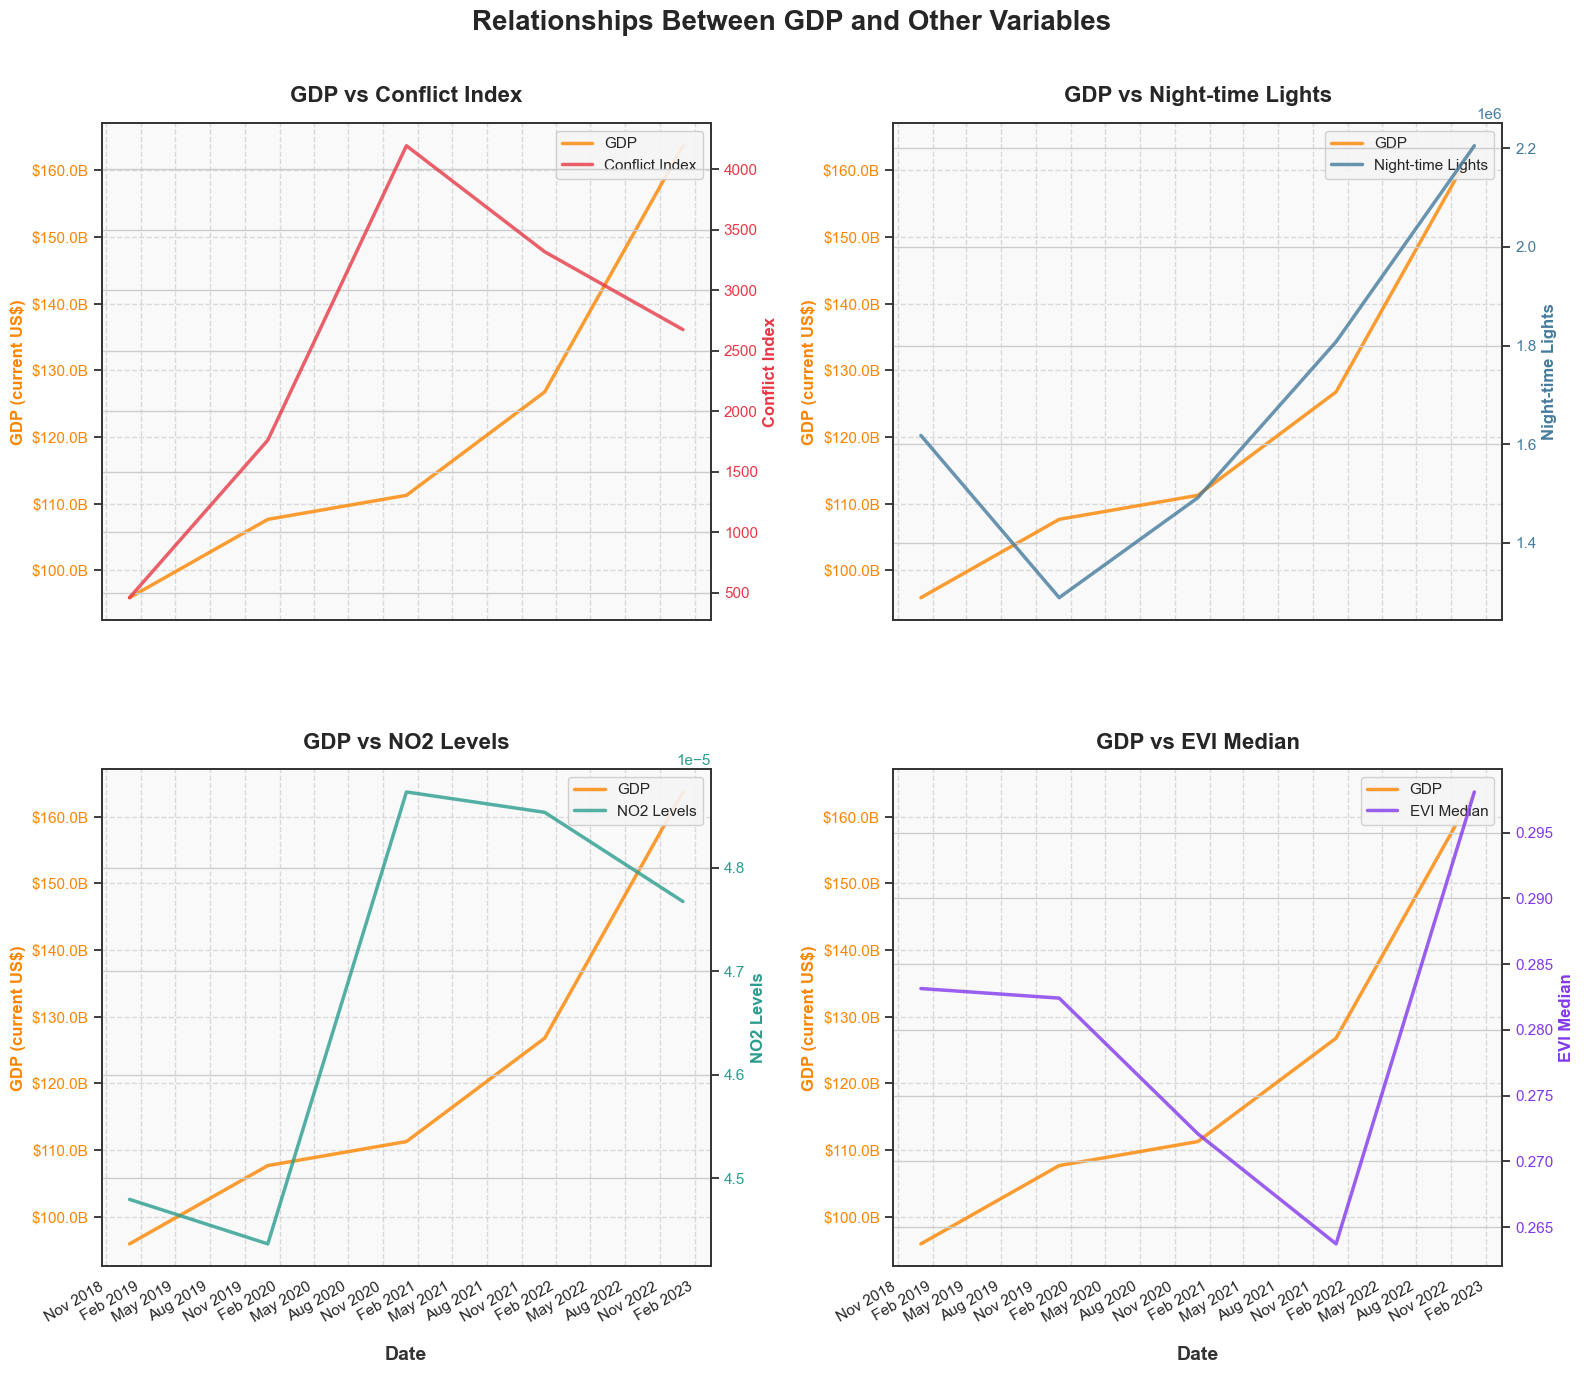

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC', 'gdp': '#FB8500'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis and create GDP twin axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Function to format GDP values (in billions)
def billions_formatter(x, pos):
    return f'${x/1e9:.1f}B'

# Plot 1: GDP vs Conflict Index
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax1, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1_twin, label='Conflict Index', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'GDP vs Conflict Index', colors['gdp'], colors['conflict'])
ax1.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax1_twin.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['conflict'])
ax1.tick_params(axis='y', labelcolor=colors['gdp'])
ax1.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: GDP vs NTL
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax2, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax2_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'GDP vs Night-time Lights', colors['gdp'], colors['ntl'])
ax2.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax2_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax2.tick_params(axis='y', labelcolor=colors['gdp'])
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: GDP vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax3, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'GDP vs NO2 Levels', colors['gdp'], colors['no2'])
ax3.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['gdp'])
ax3.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: GDP vs EVI Median
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax4, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'GDP vs EVI Median', colors['gdp'], colors['evi'])
ax4.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['gdp'])
ax4.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Relationships Between GDP and Other Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/gdp_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

In [30]:
conflict_adm1_monthly.rename(columns={'event_date':'date'}, inplace=True)
evi_adm1_monthly.rename(columns={'mean':'evi_median'}, inplace=True)

airpollution_adm1['date'] = pd.to_datetime(airpollution_adm1['date'])
#ntl_adm1_monthly_hdx['date'] = pd.to_datetime(ntl_adm1_monthly_hdx['date'])
evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
evi_adm1_monthly['date'] = pd.to_datetime(evi_adm1_monthly['date'])
conflict_adm1_monthly = get_conflict_index(conflict_adm1_monthly)

In [31]:
airpollution_adm2.drop(columns=['Unnamed: 0'], inplace=True)
airpollution_adm2.rename(columns={'event_date':'date'}, inplace=True)

In [32]:
conflict_adm2_monthly.rename(columns={'event_date':'date'}, inplace=True)

airpollution_adm2['date'] = pd.to_datetime(airpollution_adm2['date'])
#ntl_adm2_monthly_hdx['date'] = pd.to_datetime(ntl_adm2_monthly_hdx['date'])
# evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
evi_adm2_monthly['date'] = pd.to_datetime(evi_adm2_monthly['date'])
conflict_adm2_monthly = get_conflict_index(conflict_adm2_monthly)

In [50]:
merged_adm1 = pd.merge(airpollution_adm1, conflict_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns=['index'], inplace=True)

#merged_adm1 = pd.merge(merged_adm1, ntl_adm1_monthly_hdx[['date', 'ntl_sum', 'ADM1_EN']], on=['date', 'ADM1_EN'], how='left')
merged_adm1 = pd.merge(merged_adm1, evi_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns={'Unnamed: 0'}, inplace=True)

In [ ]:
merged_adm2 = pd.merge(airpollution_adm2, conflict_adm2_monthly, on=['date', 'ADM1_EN', 'ADM2_EN'], how='left')
merged_adm2.drop(columns=['index'], inplace=True)

#merged_adm2 = pd.merge(merged_adm2, ntl_adm2_monthly_hdx[['date', 'ntl_sum', 'ADM2_EN']], on=['date', 'ADM2_EN'], how='left')


In [38]:
evi_adm2_monthly.rename(columns={'admin_area': 'ADM2_EN'}, inplace=True)

In [99]:
merged_adm2 = pd.merge(merged_adm2, evi_adm2_monthly, on=['date',  'ADM2_EN'], how='left')
#merged_adm2.drop(columns={'Unnamed: 0'}, inplace=True)

In [115]:
conflict_evi = pd.merge(conflict_adm2_monthly, evi_adm2_monthly, on=['date', 'ADM2_EN'], how='inner')

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Define variables
variables = ['conflict_index', 'evi_median', 'NO2', 'ntl_sum', 'GDP (current US$)']

def create_correlation_heatmaps(df, variables):
    """
    Create two heatmaps: one for correlations and one for p-values
    """
    
    # Clean data
    subset_df = df[variables].dropna()
    n_vars = len(variables)
    
    print(f"Sample size: {len(subset_df)} observations")
    
    # Calculate correlation and p-value matrices
    corr_matrix = pd.DataFrame(np.zeros((n_vars, n_vars)), 
                              index=variables, columns=variables)
    p_matrix = pd.DataFrame(np.zeros((n_vars, n_vars)), 
                           index=variables, columns=variables)
    
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i == j:
                corr_matrix.iloc[i, j] = 1.0
                p_matrix.iloc[i, j] = 0.0
            else:
                corr, p_val = pearsonr(subset_df[var1], subset_df[var2])
                corr_matrix.iloc[i, j] = corr
                p_matrix.iloc[i, j] = p_val
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap 1: Correlation Matrix
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='RdBu_r', 
                center=0, 
                square=True, 
                fmt='.3f', 
                cbar_kws={"shrink": .8},
                ax=ax1,
                vmin=-1, 
                vmax=1)
    ax1.set_title('Correlation Matrix\n(Pearson Correlation Coefficients)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    
    # Heatmap 2: P-Value Matrix
    sns.heatmap(p_matrix, 
                annot=True, 
                cmap='viridis_r', 
                square=True, 
                fmt='.4f', 
                cbar_kws={"shrink": .8, "label": "P-Value"},
                ax=ax2,
                vmin=0,
                vmax=1)
    ax2.set_title('P-Value Matrix\n(Statistical Significance)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    
    # Add significance indicators to p-value heatmap
    for i in range(len(variables)):
        for j in range(len(variables)):
            p_val = p_matrix.iloc[i, j]
            if p_val < 0.001:
                significance = '***'
            elif p_val < 0.01:
                significance = '**'
            elif p_val < 0.05:
                significance = '*'
            else:
                significance = ''
            
            if significance and i != j:  # Don't add stars to diagonal
                ax2.text(j + 0.5, i + 0.7, significance, 
                        ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary of significant correlations
    print("\nSIGNIFICANT CORRELATIONS SUMMARY:")
    print("=" * 50)
    
    significant_pairs = []
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i < j:  # Avoid duplicates
                corr_val = corr_matrix.iloc[i, j]
                p_val = p_matrix.iloc[i, j]
                
                if p_val < 0.05:
                    if p_val < 0.001:
                        sig_level = "***"
                    elif p_val < 0.01:
                        sig_level = "**"
                    else:
                        sig_level = "*"
                    
                    significant_pairs.append({
                        'Variable 1': var1,
                        'Variable 2': var2,
                        'Correlation': corr_val,
                        'P-Value': p_val,
                        'Significance': sig_level
                    })
    
    if significant_pairs:
        sig_df = pd.DataFrame(significant_pairs)
        sig_df = sig_df.sort_values('P-Value')
        
        print("Significant correlations (p < 0.05):")
        for _, row in sig_df.iterrows():
            print(f"  {row['Variable 1']} ↔ {row['Variable 2']}: r = {row['Correlation']:.3f}, p = {row['P-Value']:.4f} {row['Significance']}")
    else:
        print("No significant correlations found at p < 0.05 level")
    
    # Key findings for conflict_index vs evi_median
    conflict_evi_corr = corr_matrix.loc['conflict_index', 'evi_median']
    conflict_evi_p = p_matrix.loc['conflict_index', 'evi_median']
    
    print(f"\nKEY FINDING - CONFLICT vs EVI:")
    print("=" * 50)
    print(f"Correlation: {conflict_evi_corr:.4f}")
    print(f"P-value: {conflict_evi_p:.6f}")
    
    if conflict_evi_corr < 0:
        direction = "NEGATIVE - Higher conflict associated with lower EVI (supports hypothesis)"
    elif conflict_evi_corr > 0:
        direction = "POSITIVE - Higher conflict associated with higher EVI (contradicts hypothesis)"
    else:
        direction = "ZERO - No linear relationship"
    
    if conflict_evi_p < 0.05:
        significance = "STATISTICALLY SIGNIFICANT"
    else:
        significance = "NOT STATISTICALLY SIGNIFICANT"
    
    print(f"Direction: {direction}")
    print(f"Significance: {significance}")
    
    return corr_matrix, p_matrix



### Perason Correlation at Admin 2 Level

Sample size: 1953 observations


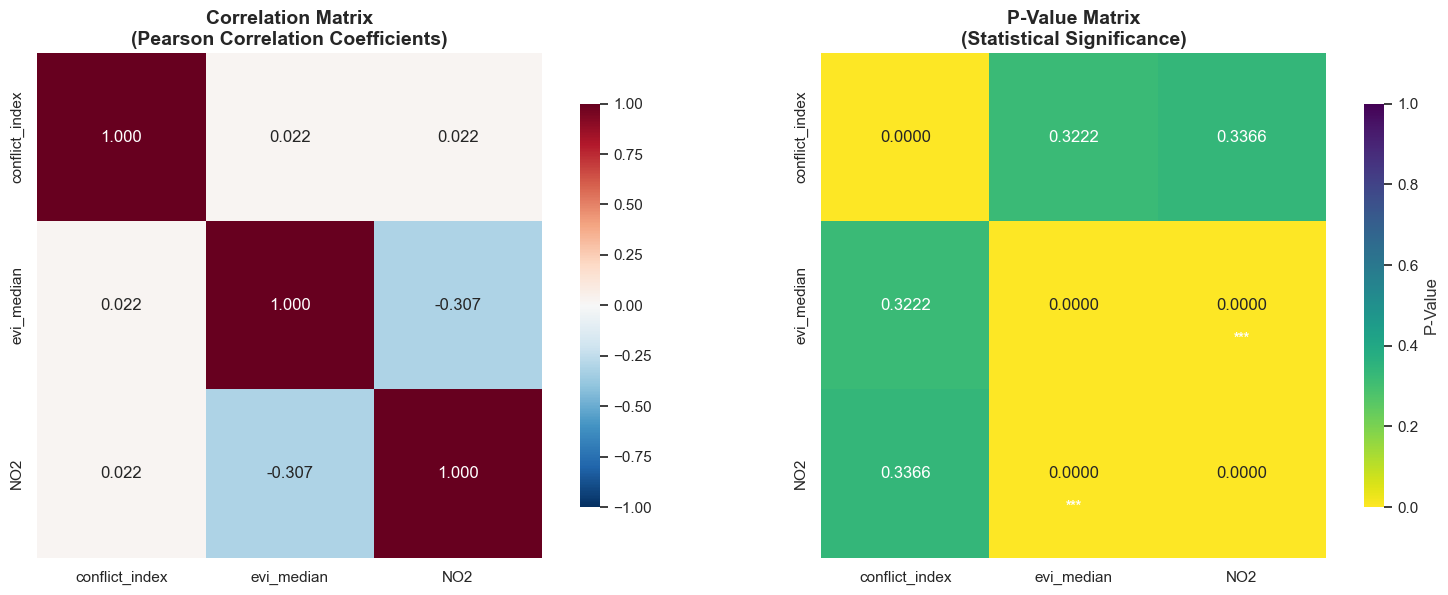


SIGNIFICANT CORRELATIONS SUMMARY:
Significant correlations (p < 0.05):
  evi_median ↔ NO2: r = -0.307, p = 0.0000 ***

KEY FINDING - CONFLICT vs EVI:
Correlation: 0.0224
P-value: 0.322158
Direction: POSITIVE - Higher conflict associated with higher EVI (contradicts hypothesis)
Significance: NOT STATISTICALLY SIGNIFICANT

LEGEND:
Correlation values:
  +1.0 = Perfect positive correlation
  +0.5 = Moderate positive correlation
   0.0 = No correlation
  -0.5 = Moderate negative correlation
  -1.0 = Perfect negative correlation

P-value significance:
  *** = p < 0.001 (highly significant)
  **  = p < 0.01  (very significant)
  *   = p < 0.05  (significant)
  (no stars) = p ≥ 0.05 (not significant)


In [184]:
variables = ['conflict_index', 'evi_median', 'NO2']

corr_matrix, p_matrix = create_correlation_heatmaps(merged_adm2, variables)

# Legend explanation
print(f"\nLEGEND:")
print("=" * 50)
print("Correlation values:")
print("  +1.0 = Perfect positive correlation")
print("  +0.5 = Moderate positive correlation") 
print("   0.0 = No correlation")
print("  -0.5 = Moderate negative correlation")
print("  -1.0 = Perfect negative correlation")
print()
print("P-value significance:")
print("  *** = p < 0.001 (highly significant)")
print("  **  = p < 0.01  (very significant)")
print("  *   = p < 0.05  (significant)")
print("  (no stars) = p ≥ 0.05 (not significant)")

## Did conflict impact EVI? 

In [54]:
evi_zscore = pd.read_csv('../../data/agriculture/processed/eth_zscore_adm2_2019_2024.csv')


In [ ]:
merged_adm2.rename(columns={'mean': 'evi_median'}, inplace=True)

In [136]:
merged_adm2.rename(columns={'mean': 'evi_median'}, inplace=True)

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("GRANGER CAUSALITY ANALYSIS ACROSS MULTIPLE AGGREGATION LEVELS")
print("="*80)

# ============================================================================
# 1. DEFINE GRANGER CAUSALITY FUNCTION FOR PRE-AGGREGATED DATA
# ============================================================================

def granger_analysis_prepped_data(df, cause_col, effect_col, df_name, max_lags=6):
    """
    Run Granger causality on pre-aggregated DataFrame
    
    Parameters:
    - df: Pre-aggregated DataFrame (should have date/year_month column)
    - cause_col: Name of the cause variable
    - effect_col: Name of the effect variable  
    - df_name: Description of the DataFrame for reporting
    - max_lags: Maximum number of lags to test
    """
    
    try:
        from statsmodels.tsa.stattools import grangercausalitytests
        
        print(f"\n{df_name.upper()} LEVEL ANALYSIS:")
        print("-" * 50)
        
        # Ensure data is sorted by time
        if 'date' in df.columns:
            df = df.sort_values('date')
        elif 'year_month' in df.columns:
            df = df.sort_values('year_month')
        elif 'year' in df.columns and 'month' in df.columns:
            df = df.sort_values(['year', 'month'])
        
        # Prepare test data
        test_data = df[[cause_col, effect_col]].dropna()
        
        print(f"Sample info:")
        print(f"  Total observations: {len(test_data)}")
        if 'date' in df.columns:
            print(f"  Date range: {df['date'].min()} to {df['date'].max()}")
        print(f"  {cause_col} mean: {test_data[cause_col].mean():.4f}")
        print(f"  {effect_col} mean: {test_data[effect_col].mean():.4f}")
        
        if len(test_data) < 15:
            return {
                'df_name': df_name,
                'cause': cause_col,
                'effect': effect_col,
                'status': f"Insufficient data: {len(test_data)} observations",
                'sample_size': len(test_data)
            }
        
        # Run Granger causality tests
        results = {}
        best_p = 1.0
        best_lag = 0
        
        print(f"\nGranger Causality Results ({cause_col} → {effect_col}):")
        
        for lag in range(1, min(max_lags + 1, len(test_data)//4)):
            try:
                result = grangercausalitytests(test_data, lag, verbose=False)
                p_val = result[lag][0]['ssr_ftest'][1]
                f_stat = result[lag][0]['ssr_ftest'][0]
                
                if p_val < best_p:
                    best_p = p_val
                    best_lag = lag
                
                significance = ""
                if p_val < 0.001:
                    significance = "***"
                elif p_val < 0.01:
                    significance = "**"
                elif p_val < 0.05:
                    significance = "*"
                elif p_val < 0.1:
                    significance = "†"
                
                results[lag] = {'p_value': p_val, 'f_stat': f_stat}
                print(f"  Lag {lag}: F = {f_stat:.3f}, p = {p_val:.4f} {significance}")
                
            except Exception as e:
                print(f"  Lag {lag}: Error - {e}")
        
        return {
            'df_name': df_name,
            'cause': cause_col,
            'effect': effect_col,
            'results_by_lag': results,
            'best_lag': best_lag,
            'best_p_value': best_p,
            'sample_size': len(test_data),
            'status': 'Success'
        }
        
    except ImportError:
        return {
            'df_name': df_name,
            'cause': cause_col,
            'effect': effect_col,
            'status': 'Error: Install statsmodels (pip install statsmodels)',
            'sample_size': 0
        }
    except Exception as e:
        return {
            'df_name': df_name,
            'cause': cause_col,
            'effect': effect_col,
            'status': f'Error: {str(e)}',
            'sample_size': len(df) if df is not None else 0
        }

GRANGER CAUSALITY ANALYSIS ACROSS MULTIPLE AGGREGATION LEVELS


In [162]:
import pandas as pd
import numpy as np



def new_granger_function(df, cause_col='conflict_index', effect_col='evi_median', max_lags=6):
    """
    Your new function that's giving different results
    """
    try:
        from statsmodels.tsa.stattools import grangercausalitytests
        
        print(f"\nNEW FUNCTION:")
        print(f"  Input data shape: {df.shape}")
        
        # This function might be doing different preprocessing
        # Check for any differences in data preparation
        
        # Ensure data is sorted by time (this could be a difference!)
        if 'date' in df.columns:
            df_sorted = df.sort_values('date')
            print(f"  Sorted by date")
        elif 'year_month' in df.columns:
            df_sorted = df.sort_values('year_month')
            print(f"  Sorted by year_month")
        else:
            df_sorted = df.copy()
            print(f"  No sorting applied")
        
        test_data = df_sorted[[cause_col, effect_col]].dropna()
        print(f"  After dropna and sorting: {len(test_data)} observations")
        
        if len(test_data) < 15:
            return f"Insufficient data: {len(test_data)}"
        
        results = {}
        best_p = 1.0
        
        print(f"  Testing lags 1-{max_lags}:")
        
        for lag in range(1, min(max_lags + 1, len(test_data)//4)):
            try:
                result = grangercausalitytests(test_data, lag, verbose=False)
                p_val = result[lag][0]['ssr_ftest'][1]
                f_stat = result[lag][0]['ssr_ftest'][0]
                
                results[lag] = {'p_value': p_val, 'f_stat': f_stat}
                
                if p_val < best_p:
                    best_p = p_val
                
                print(f"    Lag {lag}: p = {p_val:.6f}, F = {f_stat:.3f}")
                
            except Exception as e:
                print(f"    Lag {lag}: Error - {e}")
        
        print(f"  BEST P-VALUE: {best_p:.6f}")
        return results
        
    except Exception as e:
        return f"Error: {e}"



In [168]:
correlation = df['conflict_index'].corr(df['evi_median'])
print(f"Correlation: {correlation:.4f}")

if correlation < 0:
    print("📉 NEGATIVE: Higher conflict → Lower EVI (vegetation decline)")
elif correlation > 0:
    print("📈 POSITIVE: Higher conflict → Higher EVI (vegetation increase)")

Correlation: 0.0224
📈 POSITIVE: Higher conflict → Higher EVI (vegetation increase)


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

print("="*80)
print("DETERMINING EFFECT DIRECTION: CONFLICT → EVI UP OR DOWN?")
print("="*80)

def analyze_effect_direction(df, cause_col='conflict_index', effect_col='evi_median'):
    """
    Analyze the direction of the conflict → EVI relationship
    """
    
    print("1. BASIC CORRELATION ANALYSIS")
    print("-" * 50)
    
    # Clean data
    clean_data = df[[cause_col, effect_col]].dropna()
    
    if len(clean_data) < 10:
        print("Insufficient data for direction analysis")
        return
    
    # Calculate correlation
    correlation = clean_data[cause_col].corr(clean_data[effect_col])
    
    print(f"Correlation between {cause_col} and {effect_col}: {correlation:.4f}")
    
    if correlation < 0:
        print("📉 NEGATIVE CORRELATION: Higher conflict → Lower EVI")
        print("   Interpretation: Conflict REDUCES vegetation health")
        direction = "DOWN"
    elif correlation > 0:
        print("📈 POSITIVE CORRELATION: Higher conflict → Higher EVI") 
        print("   Interpretation: Conflict INCREASES vegetation health (unexpected!)")
        direction = "UP"
    else:
        print("➡️  ZERO CORRELATION: No clear relationship")
        direction = "NONE"
    
    # Statistical significance of correlation
    corr_stat, corr_p = stats.pearsonr(clean_data[cause_col], clean_data[effect_col])
    print(f"Correlation significance: p = {corr_p:.4f}")
    
    if corr_p < 0.05:
        print(f"✅ Correlation is statistically significant")
    else:
        print(f"❌ Correlation is NOT statistically significant")
    
    return correlation, direction, clean_data

def regression_analysis(clean_data, cause_col, effect_col):
    """
    Detailed regression analysis to understand the relationship
    """
    
    print(f"\n2. REGRESSION ANALYSIS")
    print("-" * 50)
    
    X = clean_data[cause_col].values.reshape(-1, 1)
    y = clean_data[effect_col].values
    
    # Fit regression
    model = LinearRegression().fit(X, y)
    coefficient = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)
    
    print(f"Regression equation: {effect_col} = {intercept:.4f} + {coefficient:.4f} × {cause_col}")
    print(f"R-squared: {r_squared:.4f}")
    
    if coefficient < 0:
        print(f"📉 NEGATIVE COEFFICIENT: {coefficient:.4f}")
        print(f"   For each 1-unit increase in {cause_col}, {effect_col} DECREASES by {abs(coefficient):.4f}")
        print(f"   ✅ This supports the hypothesis: Conflict → Vegetation decline")
    elif coefficient > 0:
        print(f"📈 POSITIVE COEFFICIENT: {coefficient:.4f}")
        print(f"   For each 1-unit increase in {cause_col}, {effect_col} INCREASES by {coefficient:.4f}")
        print(f"   ⚠️  This contradicts the hypothesis: Conflict → Vegetation growth")
    else:
        print(f"➡️  ZERO COEFFICIENT: No relationship")
    
    # Effect size interpretation
    print(f"\n3. EFFECT SIZE INTERPRETATION")
    print("-" * 50)
    
    # Calculate effect for meaningful increases in conflict
    conflict_std = clean_data[cause_col].std()
    conflict_range = clean_data[cause_col].max() - clean_data[cause_col].min()
    
    effect_1std = coefficient * conflict_std
    effect_max = coefficient * conflict_range
    
    print(f"Effect of 1 standard deviation increase in conflict:")
    print(f"  {cause_col} std dev: {conflict_std:.4f}")
    print(f"  Predicted change in {effect_col}: {effect_1std:.4f}")
    
    print(f"\nEffect of moving from min to max conflict:")
    print(f"  {cause_col} range: {conflict_range:.4f}")
    print(f"  Predicted change in {effect_col}: {effect_max:.4f}")
    
    # Put in percentage terms if possible
    evi_mean = clean_data[effect_col].mean()
    effect_1std_pct = (effect_1std / evi_mean) * 100 if evi_mean != 0 else 0
    effect_max_pct = (effect_max / evi_mean) * 100 if evi_mean != 0 else 0
    
    print(f"\nAs percentage of mean {effect_col} ({evi_mean:.4f}):")
    print(f"  1 std dev conflict increase: {effect_1std_pct:.2f}% change")
    print(f"  Min to max conflict: {effect_max_pct:.2f}% change")
    
    return coefficient, effect_1std, effect_max

def granger_coefficient_analysis(df, cause_col='conflict_index', effect_col='evi_median'):
    """
    Extract coefficient information from Granger causality results
    """
    
    print(f"\n4. GRANGER CAUSALITY COEFFICIENT ANALYSIS")
    print("-" * 50)
    
    try:
        from statsmodels.tsa.stattools import grangercausalitytests
        from statsmodels.tsa.vector_ar.var_model import VAR
        
        # Prepare data
        clean_data = df[[cause_col, effect_col]].dropna()
        
        if 'date' in df.columns:
            df_with_date = df[[cause_col, effect_col, 'date']].dropna()
            clean_data = df_with_date.sort_values('date')[[cause_col, effect_col]]
        
        if len(clean_data) < 20:
            print("Insufficient data for VAR analysis")
            return
        
        print(f"Using {len(clean_data)} observations for VAR analysis")
        
        # Fit VAR model to get detailed coefficients
        var_model = VAR(clean_data)
        
        # Try different lag lengths
        for lag in [1, 2, 3]:
            try:
                fitted_model = var_model.fit(lag)
                
                print(f"\nVAR Model with {lag} lag(s):")
                
                # Get equation for effect variable
                effect_eq = fitted_model.params.loc[:, effect_col]
                
                # Look for coefficients on lagged cause variable
                cause_coeffs = []
                for i in range(1, lag + 1):
                    coeff_name = f'{cause_col}.L{i}'
                    if coeff_name in effect_eq.index:
                        coeff_value = effect_eq[coeff_name]
                        cause_coeffs.append((i, coeff_value))
                        
                        if coeff_value < 0:
                            print(f"  Lag {i} coefficient: {coeff_value:.4f} (NEGATIVE - conflict reduces EVI)")
                        elif coeff_value > 0:
                            print(f"  Lag {i} coefficient: {coeff_value:.4f} (POSITIVE - conflict increases EVI)")
                        else:
                            print(f"  Lag {i} coefficient: {coeff_value:.4f} (ZERO - no effect)")
                
                # Sum of all lag coefficients (cumulative effect)
                if cause_coeffs:
                    total_effect = sum([coeff for _, coeff in cause_coeffs])
                    print(f"  Total cumulative effect: {total_effect:.4f}")
                    
                    if total_effect < 0:
                        print(f"  ✅ OVERALL NEGATIVE EFFECT: Conflict → EVI decline")
                    elif total_effect > 0:
                        print(f"  ⚠️  OVERALL POSITIVE EFFECT: Conflict → EVI increase")
                
            except Exception as e:
                print(f"  VAR with {lag} lags failed: {e}")
        
    except ImportError:
        print("Cannot perform VAR analysis - statsmodels not available")
    except Exception as e:
        print(f"VAR analysis error: {e}")

def visualize_relationship(clean_data, cause_col, effect_col, correlation, direction):
    """
    Create visualizations of the relationship
    """
    
    print(f"\n5. VISUALIZING THE RELATIONSHIP")
    print("-" * 50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Scatter plot with regression line
    ax1 = axes[0, 0]
    ax1.scatter(clean_data[cause_col], clean_data[effect_col], alpha=0.6, color='blue')
    
    # Add regression line
    z = np.polyfit(clean_data[cause_col], clean_data[effect_col], 1)
    p = np.poly1d(z)
    ax1.plot(clean_data[cause_col], p(clean_data[cause_col]), "r--", linewidth=2)
    
    ax1.set_xlabel(cause_col)
    ax1.set_ylabel(effect_col)
    ax1.set_title(f'Relationship: {cause_col} vs {effect_col}\nCorrelation: {correlation:.3f}')
    ax1.grid(True, alpha=0.3)
    
    # Add direction annotation
    if direction == "DOWN":
        ax1.text(0.05, 0.95, "📉 Conflict → EVI Down", transform=ax1.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    elif direction == "UP":
        ax1.text(0.05, 0.95, "📈 Conflict → EVI Up", transform=ax1.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    
    # Plot 2: Binned analysis
    ax2 = axes[0, 1]
    
    # Create conflict bins
    n_bins = 5
    clean_data_copy = clean_data.copy()
    clean_data_copy['conflict_bin'] = pd.qcut(clean_data_copy[cause_col], n_bins, 
                                             labels=[f'Q{i+1}' for i in range(n_bins)])
    
    # Calculate mean EVI by conflict bin
    bin_means = clean_data_copy.groupby('conflict_bin')[effect_col].agg(['mean', 'std', 'count'])
    
    bars = ax2.bar(range(len(bin_means)), bin_means['mean'], 
                   yerr=bin_means['std'], capsize=5, alpha=0.7, 
                   color='green' if direction == "UP" else 'red')
    
    ax2.set_xticks(range(len(bin_means)))
    ax2.set_xticklabels(bin_means.index)
    ax2.set_xlabel('Conflict Quintiles (Low → High)')
    ax2.set_ylabel(f'Mean {effect_col}')
    ax2.set_title('EVI by Conflict Level')
    
    # Add sample sizes on bars
    for i, (bar, count) in enumerate(zip(bars, bin_means['count'])):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'n={int(count)}', ha='center', va='bottom', fontsize=8)
    
    # Plot 3: Time series if date available
    ax3 = axes[1, 0]
    if 'date' in clean_data.columns:
        ax3.plot(clean_data['date'], clean_data[cause_col], 'r-', alpha=0.7, label=cause_col)
        ax3_twin = ax3.twinx()
        ax3_twin.plot(clean_data['date'], clean_data[effect_col], 'g-', alpha=0.7, label=effect_col)
        ax3.set_xlabel('Date')
        ax3.set_ylabel(cause_col, color='red')
        ax3_twin.set_ylabel(effect_col, color='green')
        ax3.set_title('Time Series: Conflict and EVI')
        ax3.tick_params(axis='x', rotation=45)
    else:
        ax3.text(0.5, 0.5, 'No date column available\nfor time series plot', 
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Time Series (Not Available)')
    
    # Plot 4: Distribution comparison
    ax4 = axes[1, 1]
    
    # Split into high/low conflict
    median_conflict = clean_data[cause_col].median()
    low_conflict = clean_data[clean_data[cause_col] <= median_conflict][effect_col]
    high_conflict = clean_data[clean_data[cause_col] > median_conflict][effect_col]
    
    ax4.hist(low_conflict, alpha=0.7, label='Low Conflict', bins=20, color='lightblue')
    ax4.hist(high_conflict, alpha=0.7, label='High Conflict', bins=20, color='darkred')
    
    ax4.axvline(low_conflict.mean(), color='blue', linestyle='--', 
                label=f'Low Mean: {low_conflict.mean():.3f}')
    ax4.axvline(high_conflict.mean(), color='red', linestyle='--',
                label=f'High Mean: {high_conflict.mean():.3f}')
    
    ax4.set_xlabel(effect_col)
    ax4.set_ylabel('Frequency')
    ax4.set_title('EVI Distribution: Low vs High Conflict')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

def summarize_direction_findings(correlation, direction, coefficient=None):
    """
    Provide clear summary of direction findings
    """
    
    print(f"\n6. SUMMARY: EFFECT DIRECTION")
    print("-" * 50)
    
    print(f"CORRELATION: {correlation:.4f}")
    
    if direction == "DOWN":
        print(f"""
✅ CONFLICT PREDICTS EVI DECLINE
- Higher conflict → Lower vegetation health
- This SUPPORTS the expected hypothesis
- Conflict appears to damage environmental conditions
- Mechanism: War destroys vegetation, disrupts agriculture, etc.
""")
    elif direction == "UP":
        print(f"""
⚠️  CONFLICT PREDICTS EVI INCREASE  
- Higher conflict → Higher vegetation health
- This CONTRADICTS the expected hypothesis
- Possible explanations:
  * Data quality issues
  * Reverse causality (fertile areas more fought over)
  * Confounding variables (climate, seasonality)
  * Measurement problems
""")
    else:
        print(f"""
➡️  NO CLEAR DIRECTIONAL RELATIONSHIP
- Conflict does not predict consistent EVI changes
- May indicate:
  * Very weak relationship
  * Non-linear relationship
  * Context-dependent effects
""")
    
    print(f"\nRECOMMENDATION:")
    if direction == "DOWN":
        print(f"- Your hypothesis is supported by the data direction")
        print(f"- Focus on strengthening statistical significance")
        print(f"- Explore different model specifications")
    elif direction == "UP":
        print(f"- Investigate why results contradict expectations")
        print(f"- Check data quality and variable definitions")
        print(f"- Consider alternative explanations")
    else:
        print(f"- Consider non-linear or threshold models")
        print(f"- Explore subgroup analyses")
        print(f"- Check for seasonal or regional patterns")

# ============================================================================
# MAIN ANALYSIS FUNCTION
# ============================================================================

def determine_conflict_evi_direction(df, cause_col='conflict_index', effect_col='evi_median'):
    """
    Complete analysis of whether conflict predicts EVI up or down
    """
    
    print("COMPLETE DIRECTION ANALYSIS")
    print("="*80)
    
    # Basic analysis
    correlation, direction, clean_data = analyze_effect_direction(df, cause_col, effect_col)
    
    # Regression analysis
    coefficient, effect_1std, effect_max = regression_analysis(clean_data, cause_col, effect_col)
    
    # Granger coefficients
    granger_coefficient_analysis(df, cause_col, effect_col)
    
    # Visualizations
    visualize_relationship(clean_data, cause_col, effect_col, correlation, direction)
    
    # Summary
    summarize_direction_findings(correlation, direction, coefficient)
    
    return {
        'correlation': correlation,
        'direction': direction,
        'coefficient': coefficient,
        'effect_1std': effect_1std,
        'effect_max': effect_max
    }

print("="*80)
print("TO ANALYZE YOUR DATA:")
print("="*80)
print("result = determine_conflict_evi_direction(your_dataframe)")
print("Replace 'your_dataframe' with your actual DataFrame name")

DETERMINING EFFECT DIRECTION: CONFLICT → EVI UP OR DOWN?
TO ANALYZE YOUR DATA:
result = determine_conflict_evi_direction(your_dataframe)
Replace 'your_dataframe' with your actual DataFrame name
